# Diamonds Quality-Price Analysis

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
#Load dataset
df=pd.read_csv("documents/ITCS3162/diamonds.csv")

## Pre-processing

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
#rows and columns
df.shape

(53940, 11)

In [6]:
#checking for nulls
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
#replace the x, y, and z variables with volume variable
df['volume']=df['x']*df['y']*df['z']
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [9]:
#deleting unnecessary columns 
df=df.drop(['Unnamed: 0','depth', 'table', 'x', 'y', 'z'], axis=1)

In [10]:
#converting categorical variables to numeric

#Fair (worst) to Ideal (best)
df['cut'].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                  [5, 4, 3, 2, 1], inplace=True)

#J (worst) to D (best)
df['color'].replace(['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                  [7, 6, 5, 4, 3, 2, 1], inplace=True)

#I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
df['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],
                  [8, 7, 6, 5, 4, 3, 2, 1], inplace=True)

df.head()

,carat,cut,color,clarity,price,volume
0,0.23,1,2,7,326,38.202030
1,0.21,2,2,6,326,34.505856
2,0.23,4,2,4,327,38.076885
3,0.29,2,6,5,334,46.724580
4,0.31,4,7,7,335,51.917250


## Data Understanding and Visualization

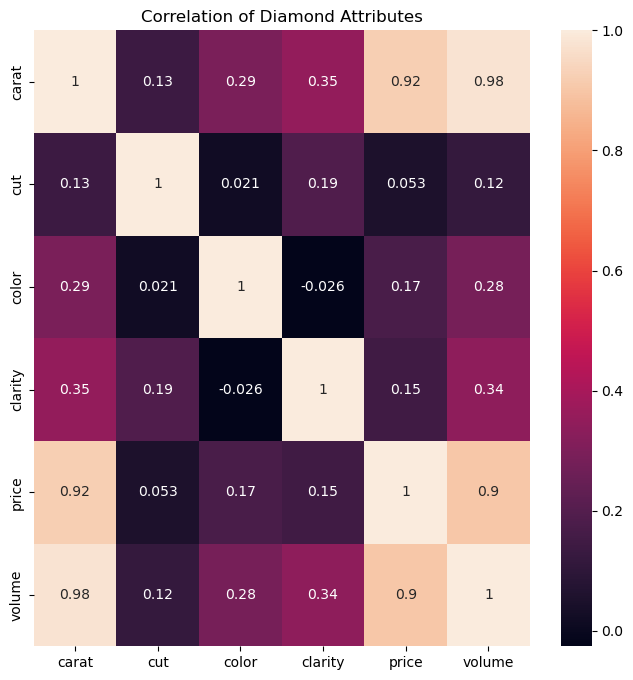

In [11]:
#Correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation of Diamond Attributes')
plt.show()

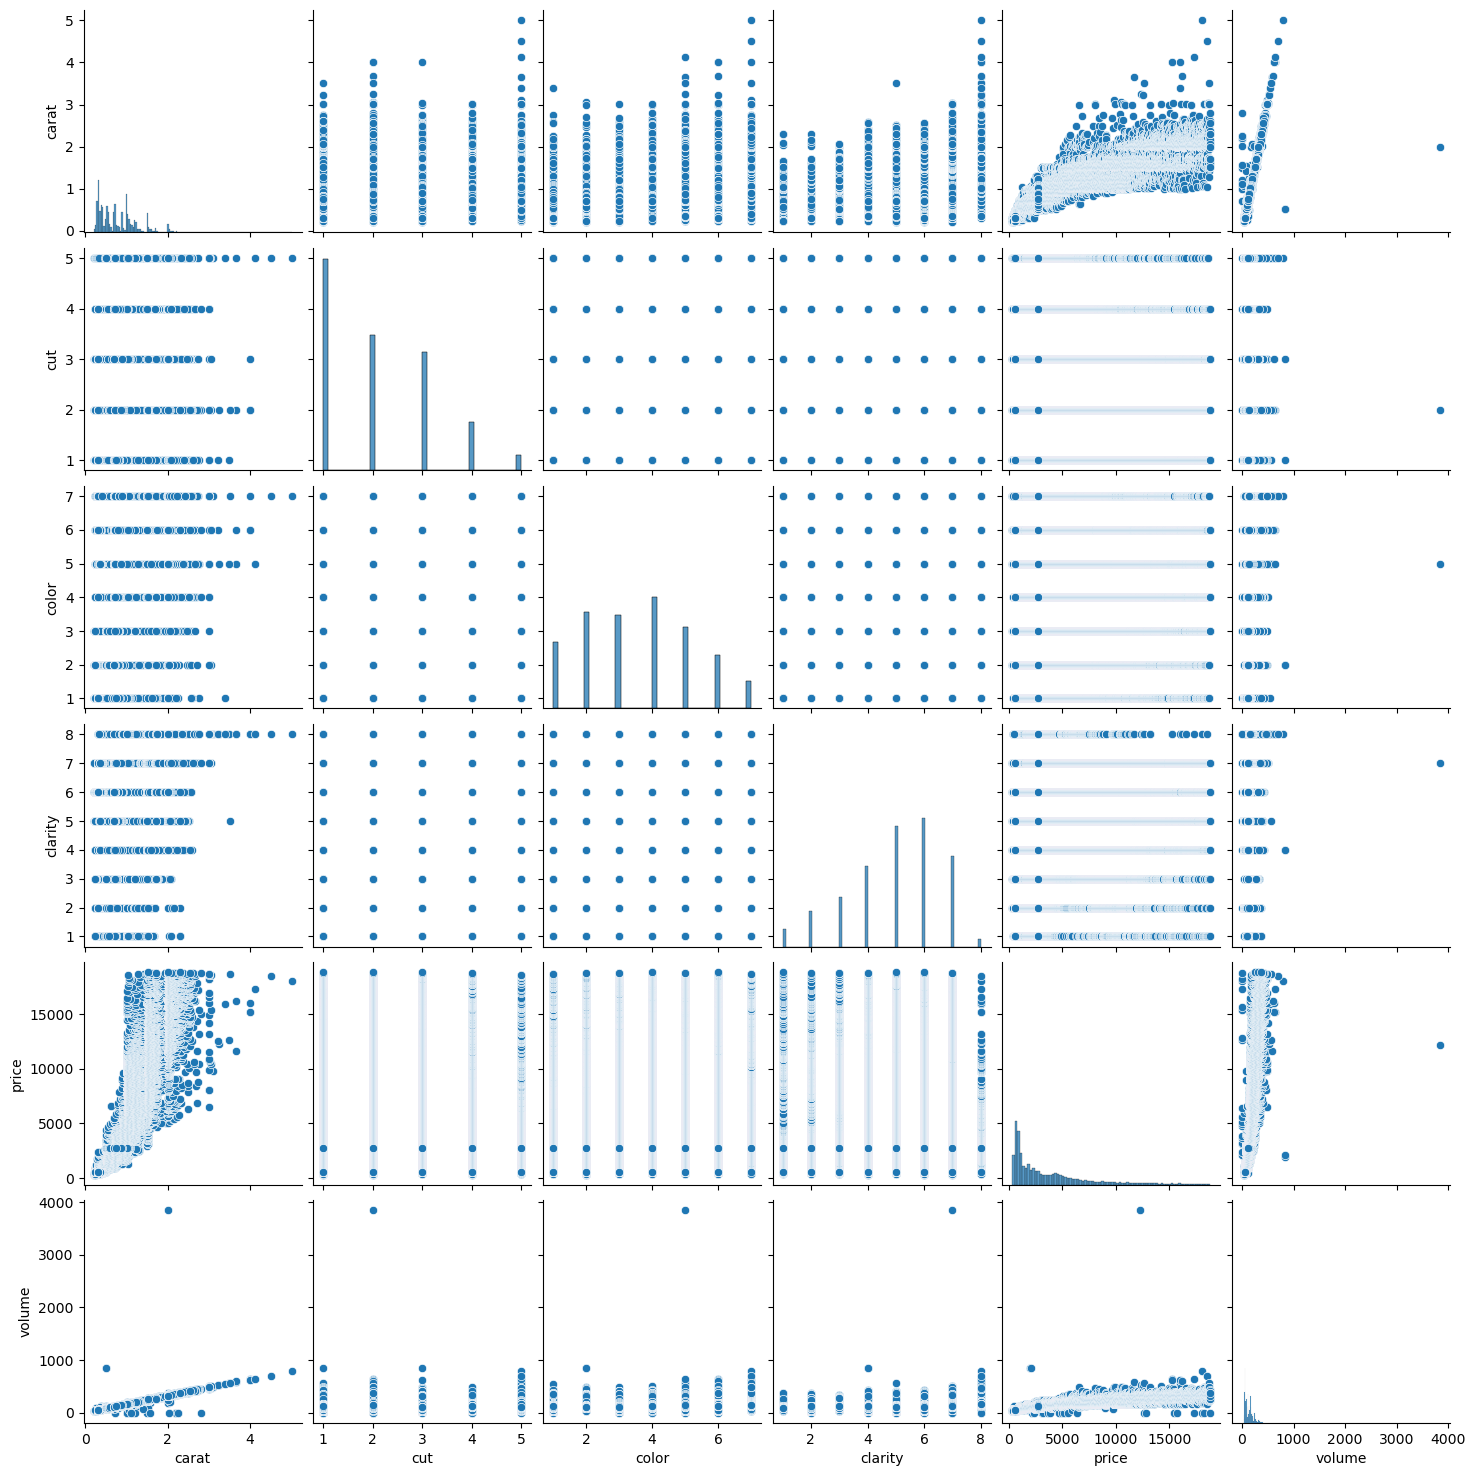

In [12]:
sns.pairplot(df)

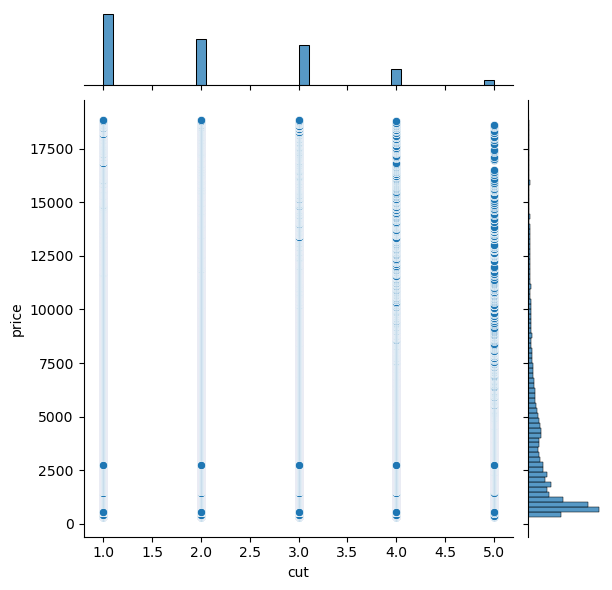

In [13]:
sns.jointplot(x="cut", y="price", data=df)

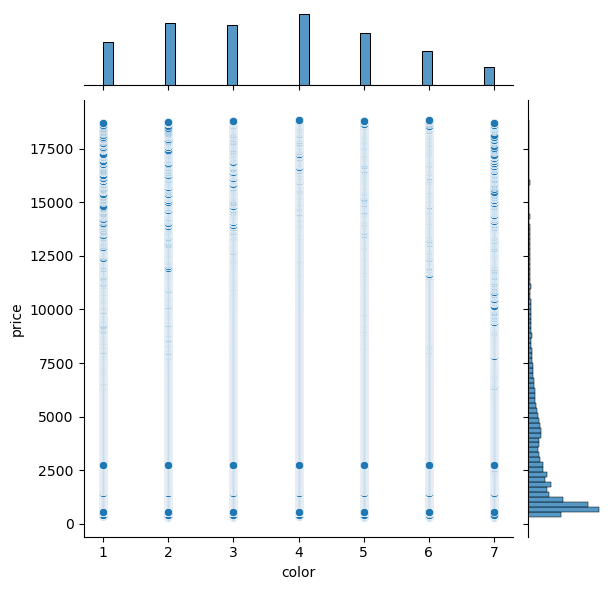

In [14]:
sns.jointplot(x="color", y="price", data=df)

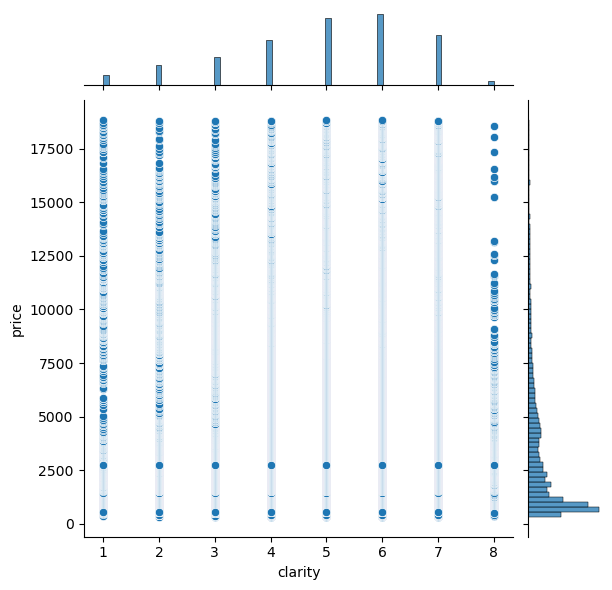

In [15]:
sns.jointplot(x="clarity", y="price", data=df)

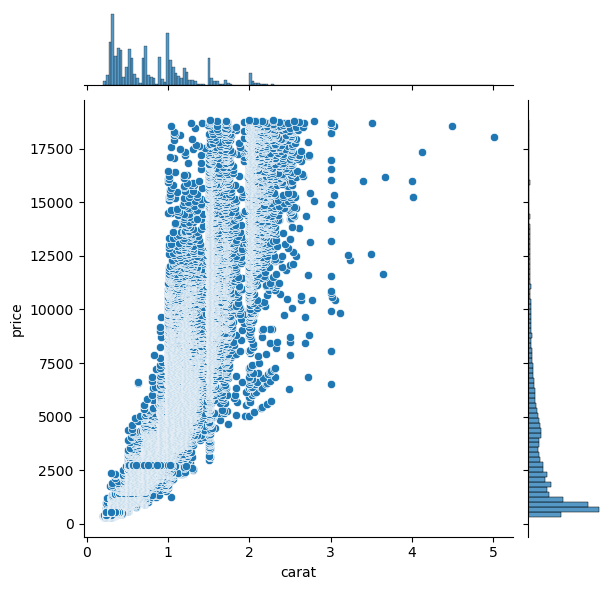

In [16]:
sns.jointplot(x="carat", y="price", data=df)